In [223]:
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [225]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

In [226]:
tf.random.set_seed(13) 
tf.debugging.set_log_device_placement(False)

tf.config.experimental.list_physical_devices('GPU')

[]

In [311]:
all_ds = pd.read_csv('train_numeric.csv')

,label,hex_lat,hex_lon,f1,f2,f3,f4,f5,f6,f8,...,f14,f15,f18,f19,f20,f21,f22,f23,f29,f30
0,1,55.729458,37.516569,0.00101,0.00103,0.00195,0.0,0.0,0.41452,0.00000,...,0.0,0.00428,0.00993,0.26303,0.02109,0.13027,0.00000,0.00000,0.01737,0.00000
1,0,55.593005,37.199516,0.00058,0.00052,0.00072,0.0,0.0,0.41452,0.00000,...,0.0,0.00105,0.00867,0.64782,0.02571,0.13368,0.00000,0.00000,0.01028,0.00000
2,0,55.714926,37.768716,0.00070,0.00075,0.00086,0.0,0.0,0.41452,0.00000,...,0.0,0.00333,0.00956,0.41109,0.04589,0.11281,0.00000,0.00000,0.01530,0.00000
3,0,55.773201,37.762513,0.00008,0.00012,0.00018,0.0,0.0,0.41452,0.00000,...,0.0,0.00269,0.00382,0.28153,0.02930,0.11592,0.00000,0.00127,0.01911,0.00000
4,0,55.811742,37.423708,0.00142,0.00123,0.00199,0.0,0.0,0.41452,0.00000,...,0.0,0.00274,0.00313,0.15433,0.02711,0.10480,0.00000,0.00000,0.01251,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140660,0,51.187341,58.315577,0.00000,0.00000,0.00000,0.0,0.0,0.00566,0.00205,...,0.0,0.00142,0.00932,0.28779,0.01384,0.05050,0.05431,0.00000,0.00761,0.00000
140661,0,54.290867,42.856206,0.00033,0.00035,0.00045,0.0,0.0,0.05626,0.00000,...,0.0,0.00285,0.00000,0.53053,0.01914,0.11790,0.00000,0.00000,0.00632,0.00000
140662,0,54.172568,45.217382,0.00050,0.00076,0.00134,0.0,0.0,0.09368,0.00000,...,0.0,0.00151,0.00000,0.27626,0.01103,0.04029,0.06331,0.00048,0.00767,0.00096
140663,0,56.211858,43.942644,0.00057,0.00065,0.00088,0.0,0.0,0.41660,0.00000,...,0.0,0.00168,0.00000,0.59168,0.03025,0.03781,0.07939,0.00000,0.01512,0.00000


In [313]:
all_ds = all_ds.sample(frac=1)

In [314]:
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.4)

(84399, 24)
(56266, 24)


In [315]:
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)

(28133, 24)
(28133, 24)


In [316]:
train_stats = train_dataset.describe()
train_stats.pop("label")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
hex_lat,84399.0,56.759472,3.905548,49.734888,54.383443,55.797494,59.184917,69.725102
hex_lon,84399.0,38.864251,7.232625,19.920451,34.372186,37.695121,41.311433,64.143997
f1,84399.0,0.000534,0.000972,0.000000,0.000120,0.000330,0.000620,0.087650
f2,84399.0,0.000577,0.000960,0.000000,0.000130,0.000350,0.000690,0.056150
f3,84399.0,0.000751,0.001174,0.000000,0.000180,0.000450,0.000910,0.059780
f4,84399.0,0.001009,0.003355,0.000000,0.000000,0.000000,0.000000,0.158050
f5,84399.0,0.000063,0.000938,0.000000,0.000000,0.000000,0.000000,0.052170
f6,84399.0,0.155190,0.174154,0.000000,0.022660,0.056260,0.414520,0.992450
f8,84399.0,0.000676,0.003785,0.000000,0.000000,0.000000,0.000000,0.431580
f9,84399.0,0.000909,0.004509,0.000000,0.000000,0.000000,0.000000,0.431580


In [317]:
train_labels = train_dataset.pop('label')
test_labels = test_dataset.pop('label')
valid_labels = valid_dataset.pop('label')

In [318]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [320]:

def build_model2_three_hidden_layers():
   
    model = Sequential()

    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))   
    model.add(Dense(32,Activation('relu')))                        
    model.add(Dense(64, Activation('relu')))                      
    model.add(Dense(128, Activation('relu')))                    
    model.add(Dense(1))                          

    learning_rate = 0.001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_198 (Dense)           (None, 32)                768       
                                                                 
 dense_199 (Dense)           (None, 32)                1056      
                                                                 
 dense_200 (Dense)           (None, 64)                2112      
                                                                 
 dense_201 (Dense)           (None, 128)               8320      
                                                                 
 dense_202 (Dense)           (None, 1)                 129       
                                                                 
Total params: 12,385
Trainable params: 12,385
Non-trainable params: 0
_________________________________________________________________


In [321]:
%%time


def build_model1_two_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    
    model.add(Dense(1))                          
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

EPOCHS = 100
batch_size = 15000
model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): 
#with tf.device('/GPU:0'): 
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),   
    )



Here is a summary of this model: 
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_203 (Dense)           (None, 32)                768       
                                                                 
 dense_204 (Dense)           (None, 1)                 33        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 0s 29ms/step - loss: 0.7743 - accuracy: 0.7433 - val_loss: 0.7489 - val_accuracy: 0.7717
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.7237 - accuracy: 0.7998 - val_loss: 0.7038 - val_accuracy: 0.8307
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6839 - accuracy: 0.8569 - val_loss: 0.6675 - val_accuracy: 0.8848

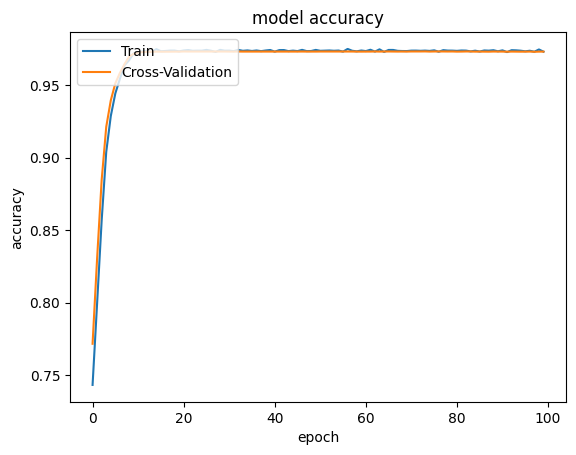

In [323]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

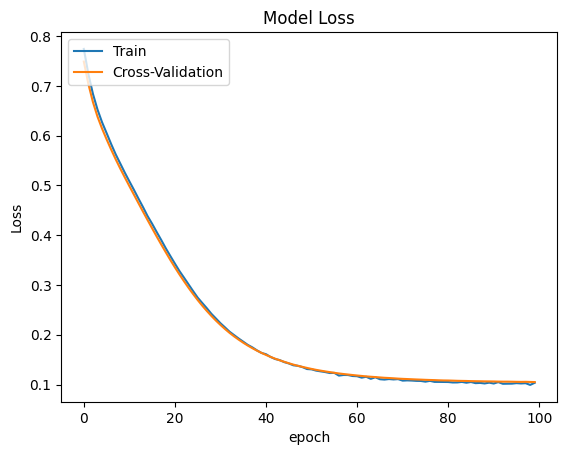

In [324]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()
